In [ ]:
#__ the below method has a drawback of requiring a large gate inductance, which has a noisy series resistance __
import math
user_input="15 15 50 13 5.924 4000 2.7 0.32 1.333"

#user_input = input("Enter design parameters as Q Qin Rs G w(Grad/s) CL(fF) Cgsunit(fF) g_per_micron(mA/V) ")
# Split the input string into a list of strings and convert them to floats
Q, Qin, Rs, G, w1, CL1, Cgsunit1, g_per_micron, Css_per_micron = map(float, user_input.split())
Css_unit=Css_per_micron*10**(-15)
g_=g_per_micron*10**(-3)
w=w1*10**9
Cgsunit=Cgsunit1*10**(-15)
CL=CL1*10**(-15)
#first pick Cgs
Cgs=1/(2*Qin*Rs*w)
W=Cgs/Cgsunit
# Then pick load inductor
Ll=1/(CL*w*w)
RL=Ll*w/Q
Rd=Q*Q*RL
#Choose g for required gain
g = G/(Rd*Qin)
#Pick corresponding Ls and Lg
Ls=Cgs*Rs/g
Lg=1/(Cgs*w*w)-Ls
print("W = ",round(W,3),'\u03BCm',"\nRd = ",round(Rd,2),'\u03A9',"\nCgs = ", round(Cgs*10**15,1),"fF\nLl = ",round(Ll*10**9,2),"nH\nLs = ",round(Ls*10**9,2),"nH\nLg = ",round(Lg*10**9,2),"nH\ng = ",round(g*10**3,3),"mA/V\nwt = ",round(g/(10**9*Cgs),3),"Grad/s")
print("Rl = ",round(RL,2),'\u03A9')
print("Rs = ",round(Ls*w/Q,2),'\u03A9')
print("Rg = ",round(Lg*w/Q,2),'\u03A9')

W =  41.68 μm 
Rd =  633.02 Ω 
Cgs =  112.5 fF
Ll =  7.12 nH
Ls =  4.11 nH
Lg =  249.1 nH
g =  1.369 mA/V
wt =  12.166 Grad/s
Rl =  2.81 Ω
Rs =  1.62 Ω
Rg =  98.38 Ω


In [86]:
#__here the width  is chosen such that Lg = 0, drawback is insane area and power consumption

user_input="15 50 13 5.984 2.7 0.32"

#user_input = input("Enter design parameters as Q Qin Rs G w(Grad/s) CL(fF) Cgsunit(fF) g_per_micron(mA/V) ")
# Split the input string into a list of strings and convert them to floats
Q, Rs, G, w1, Cgsunit1, g_per_micron = map(float, user_input.split())
g_=g_per_micron*10**(-3)
w=w1*10**9
Cgsunit=Cgsunit1*10**(-15)
#first find wt
wt=g_/Cgsunit
#find Ls
Ls=Rs/wt
#find Cgs from Ls
Cgs=1/(Ls*w*w)
#Find W from Cgs (assuming no Cgs placed extra)
W=Cgs/Cgsunit
# Then pick load inductor
Rd=2*Rs*w*G/wt
Ll=Rd/(Q*w)
RL=Ll*w/Q
#Pick corresponding Cl
Cl = 1/(w*w*Ll)
print("W = ",round(W,3),"Cload = ",Cl*10**15,'fF','\u03BCm',"\nRd = ",round(Rd,2),'\u03A9',"\nCgs = ", round(Cgs*10**15,1),"fF\nLl = ",round(Ll*10**9,2),"nH\nLs = ",round(Ls*10**9,2),"nH\nLg = ",round(Lg*10**9,2),"nH\ng = ",round(W*Cgsunit,3),"mA/V\nwt = ",round(wt,3),"Grad/s")
print("Rl = ",round(RL,2),'\u03A9')
print("Rs = ",round(Ls*w/Q,2),'\u03A9')
print("Rg = ",round(Lg*w/Q,2),'\u03A9')

W =  24517.11 Cload =  38190.113685552504 fF μm 
Rd =  65.64 Ω 
Cgs =  66196.2 fF
Ll =  0.73 nH
Ls =  0.42 nH
Lg =  6.86 nH
g =  0.0 mA/V
wt =  118518518518.519 Grad/s
Rl =  0.29 Ω
Rs =  0.17 Ω
Rg =  2.74 Ω


In [ ]:
#__ here an inductor and a parallel Cgs extra is used, short channel, gm_per_unit = const __
import math
user_input="15 7.285 2341 47 13 6.084 2.664 0.32 0"#"15 6.857 2536 50 13 5.93208 2.7 0.32"
#user_input = input("Enter design parameters as Q Lg Cp Rs G w(Grad/s) CL(fF) Cgsunit(fF) g_per_micron(mA/V) ")
# Split the input string into a list of strings and convert them to floats
Q, Lg1, Cp1, Rs, G, w1, Cgsunit1, g_per_micron, Css_per_micron = map(float, user_input.split())
g_=g_per_micron*10**(-3)
Css_unit=Css_per_micron*10**(-15)
w=w1*10**9
Cgsunit=Cgsunit1*10**(-15)
Cgsunit_=Css_unit+Cgsunit
Lg = Lg1*10**(-9)
Cp=Cp1*10**(-15)
#first find W
W=(-g_*Lg*Cp-2*Rs*Cp*Cgsunit_+g_/(w*w)+math.sqrt((-g_*Lg*Cp-2*Rs*Cp*Cgsunit_+g_/(w*w))**2-4*Rs*Cp*Cp*(Rs*Cgsunit_**2+Lg*g_*Cgsunit_)))/(2*(Cgsunit_*(Rs*Cgsunit_+Lg*g_)))
#find wt
wt=g_*W/(Cp+W*Cgsunit_)
g=g_*W
#find Ls
Ls=Rs/wt
#find Cgs from Ls
Cgs=1/((Ls+Lg)*w*w)-Cp-Css_per_micron*W
# Then pick load inductor
Rd=2*Rs*w*G/wt
Ll=Rd/(Q*w)
RL=Ll*w/Q
#Pick corresponding Cl
Cl = 1/(w*w*Ll)
print("W = ",round(W,3),"Cload = ",Cl*10**15,'fF','\u03BCm',"\nRd = ",round(Rd,2),'\u03A9',"\nCgs = ", round(Cgs*10**15,1),"fF\nLl = ",round(Ll*10**9,2),"nH\nLs = ",round(Ls*10**9,2),"nH\nLg = ",round(Lg*10**9,2),"nH\ng = ",round(W*g_per_micron,3),"mA/V\nwt = ",round(wt*10**(-9),3),"Grad/s")
print("Rl = ",round(RL,2),'\u03A9')
print("Rs = ",round(Ls*w/Q,2),'\u03A9')
print("Rg = ",round(Lg*w/Q,2),'\u03A9')
print("Qin = ",1/(2*Rs*Cgs*w))

W =  209.839 Cload =  7678.5418672048445 fF μm 
Rd =  321.09 Ω 
Cgs =  559.0 fF
Ll =  3.52 nH
Ls =  2.03 nH
Lg =  7.29 nH
g =  67.149 mA/V
wt =  23.155 Grad/s
Rl =  1.43 Ω
Rs =  0.82 Ω
Rg =  2.96 Ω
Qin =  3.1279642783177817


Minimum Positive W: 258.93563446985263
Lg_ at minimum positive W: 7.193877551020409 nm
Cp_ at minimum positive W: 2341.2244897959185 fF
No points found where W = 0


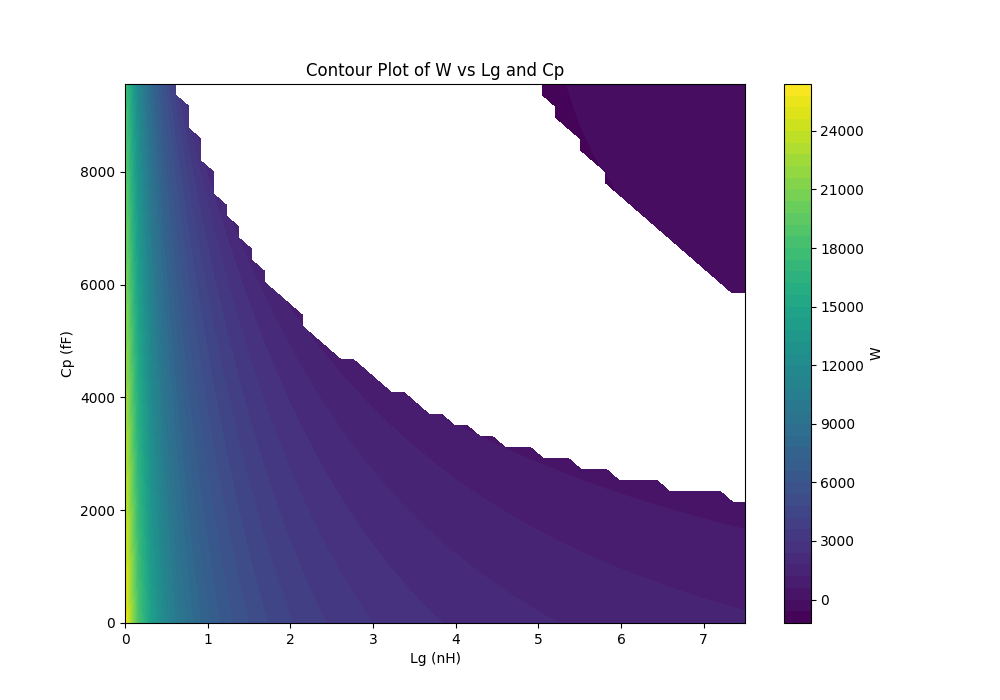

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib widget
# Input parameters
user_input = "15 7.5 9560 47 13 6.084 2.664 0.32 0"
Q, Lg1, Cp1, Rs, G, w1, Cgsunit1, g_per_micron, Css_per_micron = map(float, user_input.split())
Css_unit = Css_per_micron*10**(-15)
g_ = g_per_micron * 10**(-3)
w = w1 * 10**9

# Set up ranges for Lg_ and Cp_
Lg_range = np.linspace(0, Lg1 * 1e-9, 50)
Cp_range = np.linspace(0, Cp1 * 1e-15, 50)
Cgsunit = Cgsunit1 * 10**(-15)
Cgsunit_ = Cgsunit+Css_unit
Lg_, Cp_ = np.meshgrid(Lg_range, Cp_range)

# Calculate W
term1 = -g_ * Lg_ * Cp_
term2 = -2 * Rs * Cp_ * Cgsunit_
term3 = g_ / (w * w)

inside_sqrt = (term1 + term2 + term3)**2 - 4 * Rs * Cp_ * Cp_ * (Rs * Cgsunit_**2 + Lg_ * g_ * Cgsunit_)

# Mask negative values inside the square root
valid_mask = inside_sqrt >= 0
inside_sqrt = np.where(valid_mask, inside_sqrt, np.nan)

W = np.where(valid_mask, (term1 + term2 + term3 + np.sqrt(inside_sqrt)) / (2 * Cgsunit_ * (Rs * Cgsunit_ + Lg_ * g_)), np.nan)

# Find the minimum positive W and corresponding Lg_ and Cp_ (ignoring invalid points)
positive_W_mask = W > 0
if np.any(positive_W_mask):
    min_positive_index = np.unravel_index(np.nanargmin(np.where(positive_W_mask, W, np.nan)), W.shape)
    min_positive_W = W[min_positive_index]
    min_positive_Lg = Lg_[min_positive_index] * 1e9  # Convert to nm
    min_positive_Cp = Cp_[min_positive_index] * 1e15  # Convert to fF
    print(f"Minimum Positive W: {min_positive_W}")
    print(f"Lg_ at minimum positive W: {min_positive_Lg} nm")
    print(f"Cp_ at minimum positive W: {min_positive_Cp} fF")
else:
    print("No valid positive points found for W")

# Find Lg_ and Cp_ where W is zero
zero_indices = np.where(np.isclose(W, 0, atol=1e-12))
if len(zero_indices[0]) > 0:
    zero_Lg = Lg_[zero_indices][0] * 1e9
    zero_Cp = Cp_[zero_indices][0] * 1e15
    print(f"Minimum Lg_ where W = 0: {zero_Lg} nH")
    print(f"Corresponding Cp_ where W = 0: {zero_Cp} fF")
else:
    print("No points found where W = 0")

# Contour plot
fig, ax = plt.subplots(figsize=(10, 7))
contour = ax.contourf(Lg_ * 1e9, Cp_ * 1e15, W, levels=50, cmap='viridis')
plt.colorbar(contour, label='W')
ax.set_xlabel('Lg (nH)')
ax.set_ylabel('Cp (fF)')
ax.set_title('Contour Plot of W vs Lg and Cp')

plt.show()

